In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(threshold=np.inf)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score


import scipy as sp
np.set_printoptions(threshold=np.inf)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
# # 读取数据
# dataset= pd.read_excel('data6041.xlsx', sheet_name='Sheet1')
# X = dataset.iloc[:, 1:4]
# y = dataset.iloc[:,4]




In [3]:
# #分测试集和训练集
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # 特征归一化
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)



In [4]:
# df=dataset.iloc[:,1:5]
# df_train,df_test=train_test_split(df,test_size = 0.2, random_state = 0)
# df_train.to_csv("d://xunlian.csv")
# df_test.to_csv("d://ceshi.csv")

In [2]:

print("开始读入训练数据...")
df = pd.read_excel('../data/train6041.xlsx', sheet_name='Sheet1')


esc = StandardScaler().fit(df['Fluid resistivity logging'].values.reshape(-1, 1))
fsc = StandardScaler().fit(df['natural gamma-ray logging'].values.reshape(-1, 1))
gsc = StandardScaler().fit(df['spontaneous potential logging'].values.reshape(-1, 1))




e = esc.transform(df['Fluid resistivity logging'].values.reshape(-1, 1))
f = fsc.transform(df['natural gamma-ray logging'].values.reshape(-1, 1))
g = gsc.transform(df['spontaneous potential logging'].values.reshape(-1, 1))



X_train = np.concatenate(( e,f,g), axis=1)
y_train = np.array(df['rock'])



开始读入训练数据...


In [6]:
#生成分类器并训练
from sklearn.neural_network import MLPClassifier

classifier= MLPClassifier( random_state=0)



In [7]:
# #应用k次交叉验证评价模型性能
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# accuracies.mean()
# #accuracies.std() 
# #这意味着我们的准确度在（90-100）%之间

In [8]:
#应用网格搜索寻找最佳模型和最佳参数
from sklearn.model_selection import GridSearchCV #对人工神经网络进行检查，网格搜索优化参数。
parameters = [{'solver' : ['adam'],'learning_rate' : ['constant'],'learning_rate_init':[0.00101,0.0101,0.101],'max_iter':[100,300,500,700,900]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [9]:
#将网格搜索对象拟合到训练集
# grid_search = grid_search.fit(X_train, y_train)

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


26.8797043


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [10]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数
best_parameters = grid_search.best_params_






In [11]:
print('%.5f' %best_accuracy)
print(best_parameters)


0.72544
{'learning_rate': 'constant', 'learning_rate_init': 0.0101, 'max_iter': 300, 'solver': 'adam'}


In [12]:
parameters = [{'solver' : ['adam'],'learning_rate' : ['constant'],'learning_rate_init':[0.008,0.009,0.01,0.011,0.012],'max_iter':[100,200,300,400,500]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [13]:
# grid_search = grid_search.fit(X_train, y_train)
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


26.518555799999994


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [14]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数
best_parameters = grid_search.best_params_

In [15]:
print('%.5f' %best_accuracy)
print(best_parameters)

0.72592
{'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}


In [16]:
parameters = [{'learning_rate_init' : [0.008,0.009,0.01,0.011,0.012],'max_iter' :[200],'solver' : ['adam'],'learning_rate' : ['constant']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [17]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


7.0772963999999945


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [18]:
k1 =[0.008,0.009,0.01,0.011,0.012]
for x1 in k1:
    classifier= MLPClassifier( learning_rate_init =x1,random_state=0,max_iter=200,solver = 'adam',learning_rate = 'constant')
    classifier.fit(X_train, y_train,)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 )
   

    print('%.5f' % accuracies.mean())


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.71736


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.71539
0.72595
0.72069
0.71977


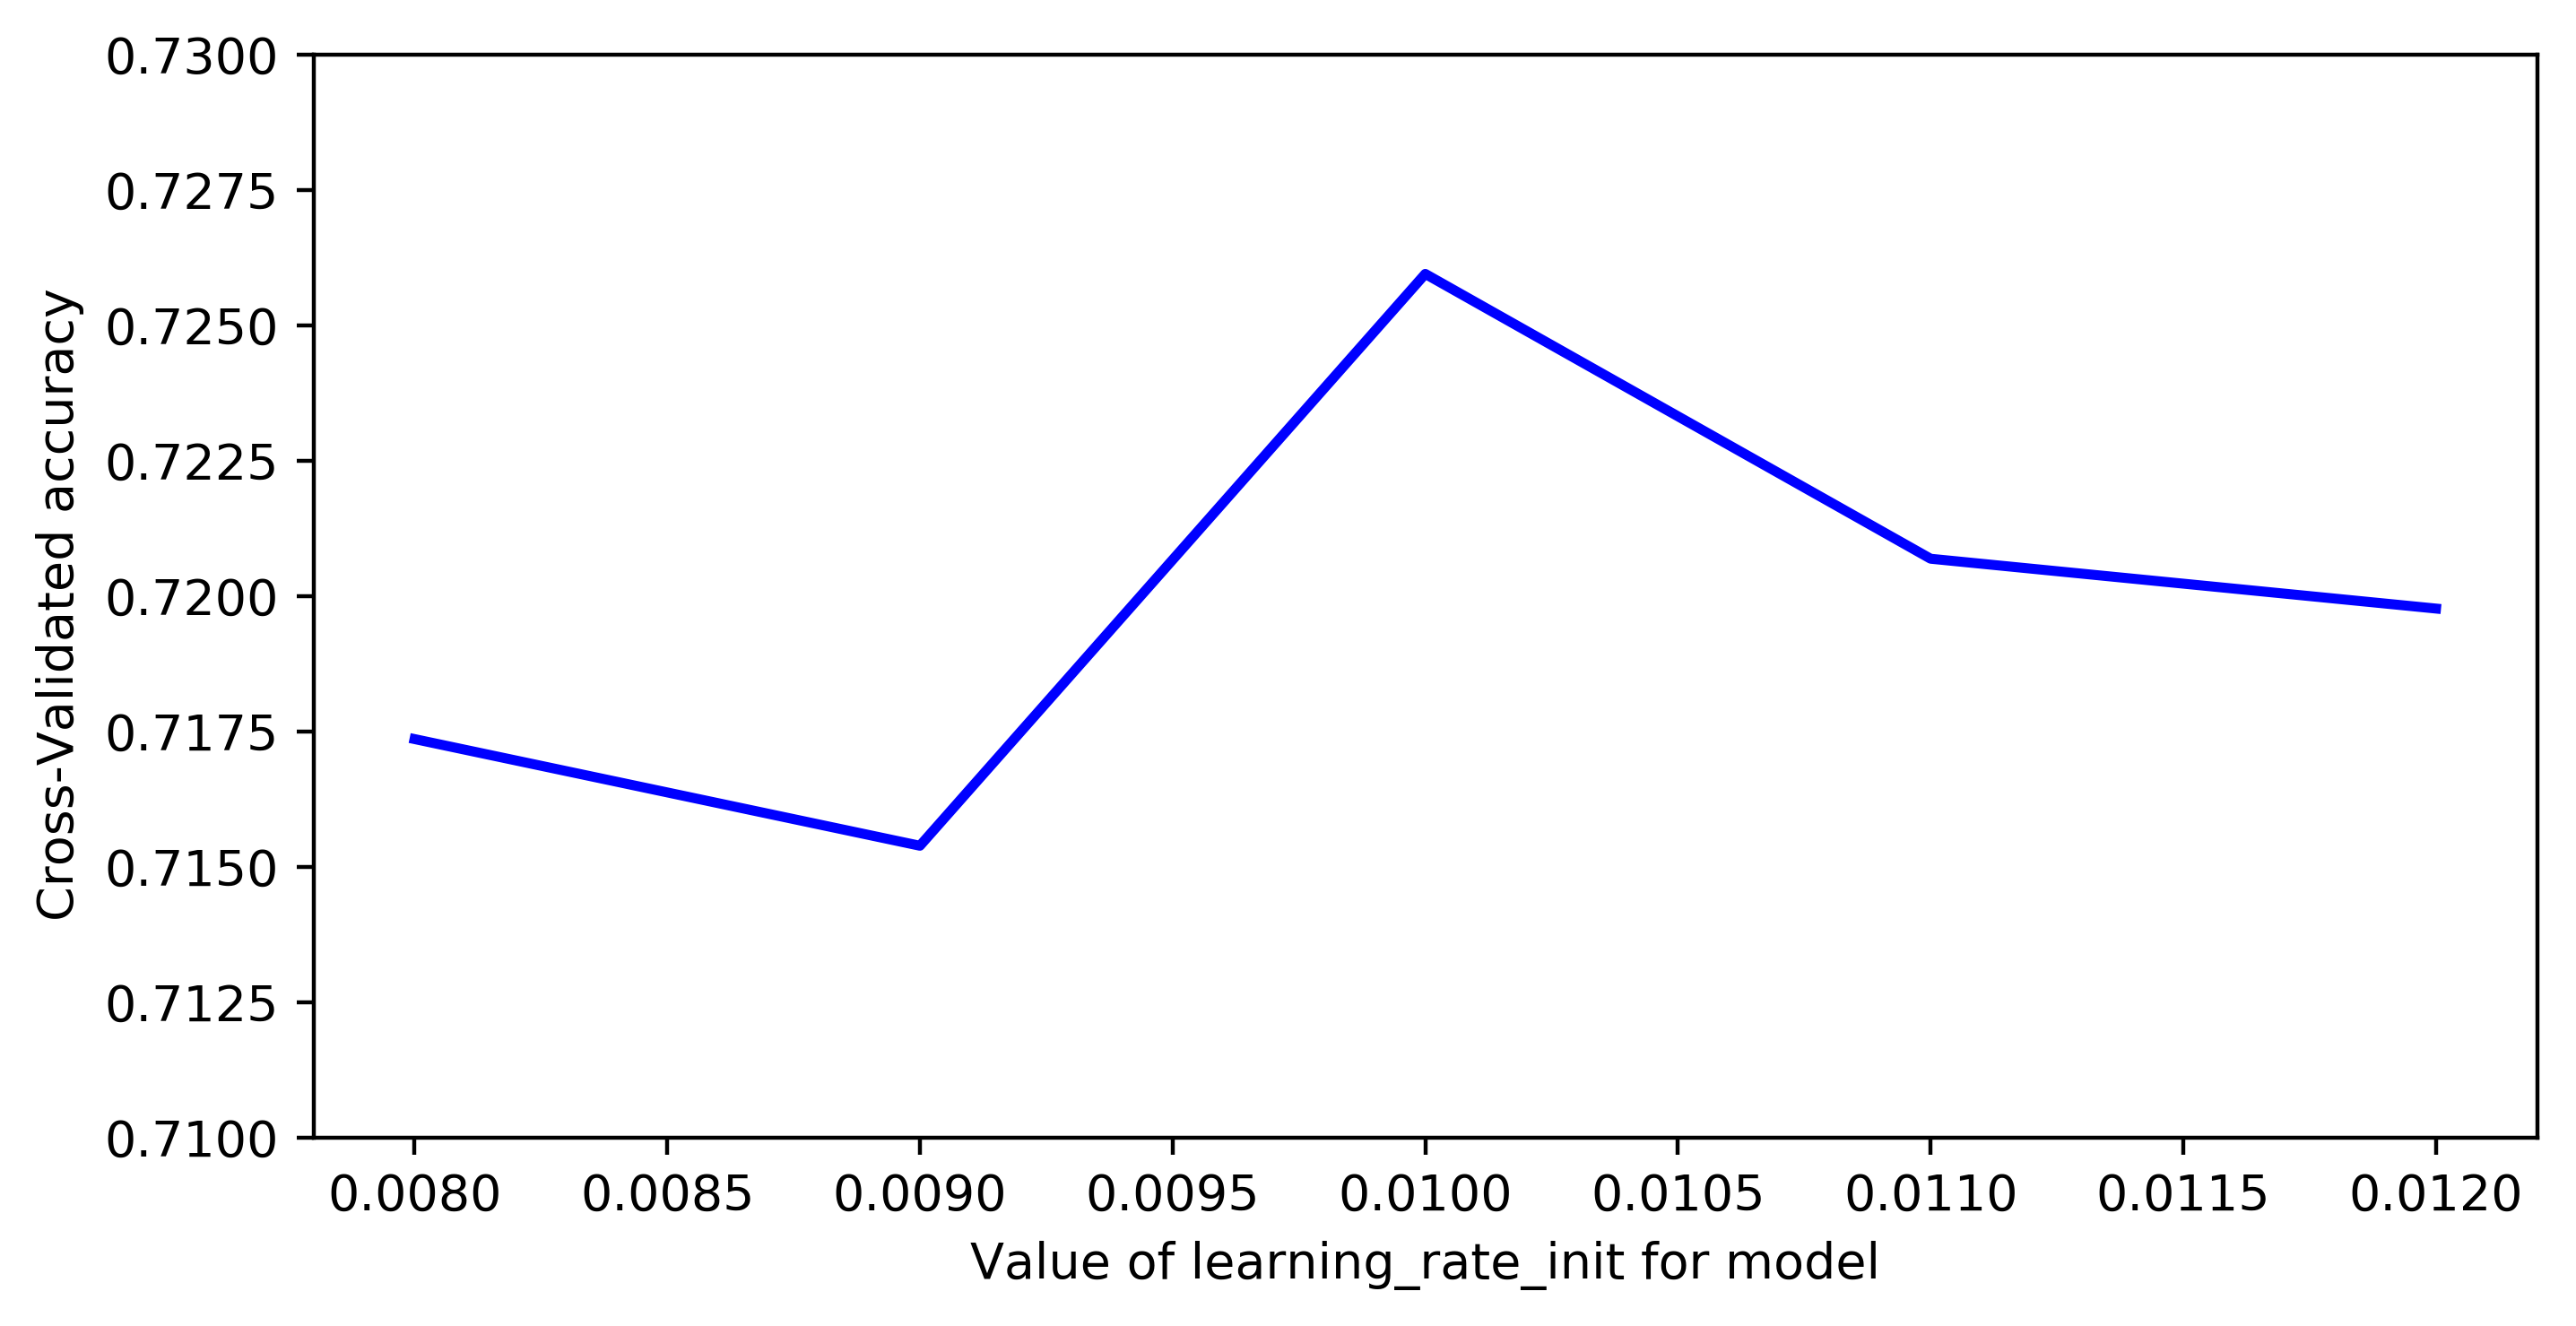

In [19]:
x =[0.008,0.009,0.01,0.011,0.012]
y=[0.71736,0.71539,0.72595,0.72069,0.71977]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of learning_rate_init for model')
plt.ylabel('Cross-Validated accuracy ')

plt.ylim(0.71,0.73)
plt.show
plt.savefig('../Data/ANN_accuracy_1.png', format='png')

In [20]:
parameters = [{'learning_rate_init' : [0.01],'max_iter' :[100,200,300,400,500],'solver' : ['adam'],'learning_rate' : ['constant']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [21]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


6.2980057999999985


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [22]:
k2 = [100,200,300,400,500]
for x2 in k2:
    classifier=  MLPClassifier( learning_rate_init =0.01,random_state=0,max_iter=x2,solver = 'adam',learning_rate = 'constant')
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.71499
0.72595
0.72595
0.72595
0.72595


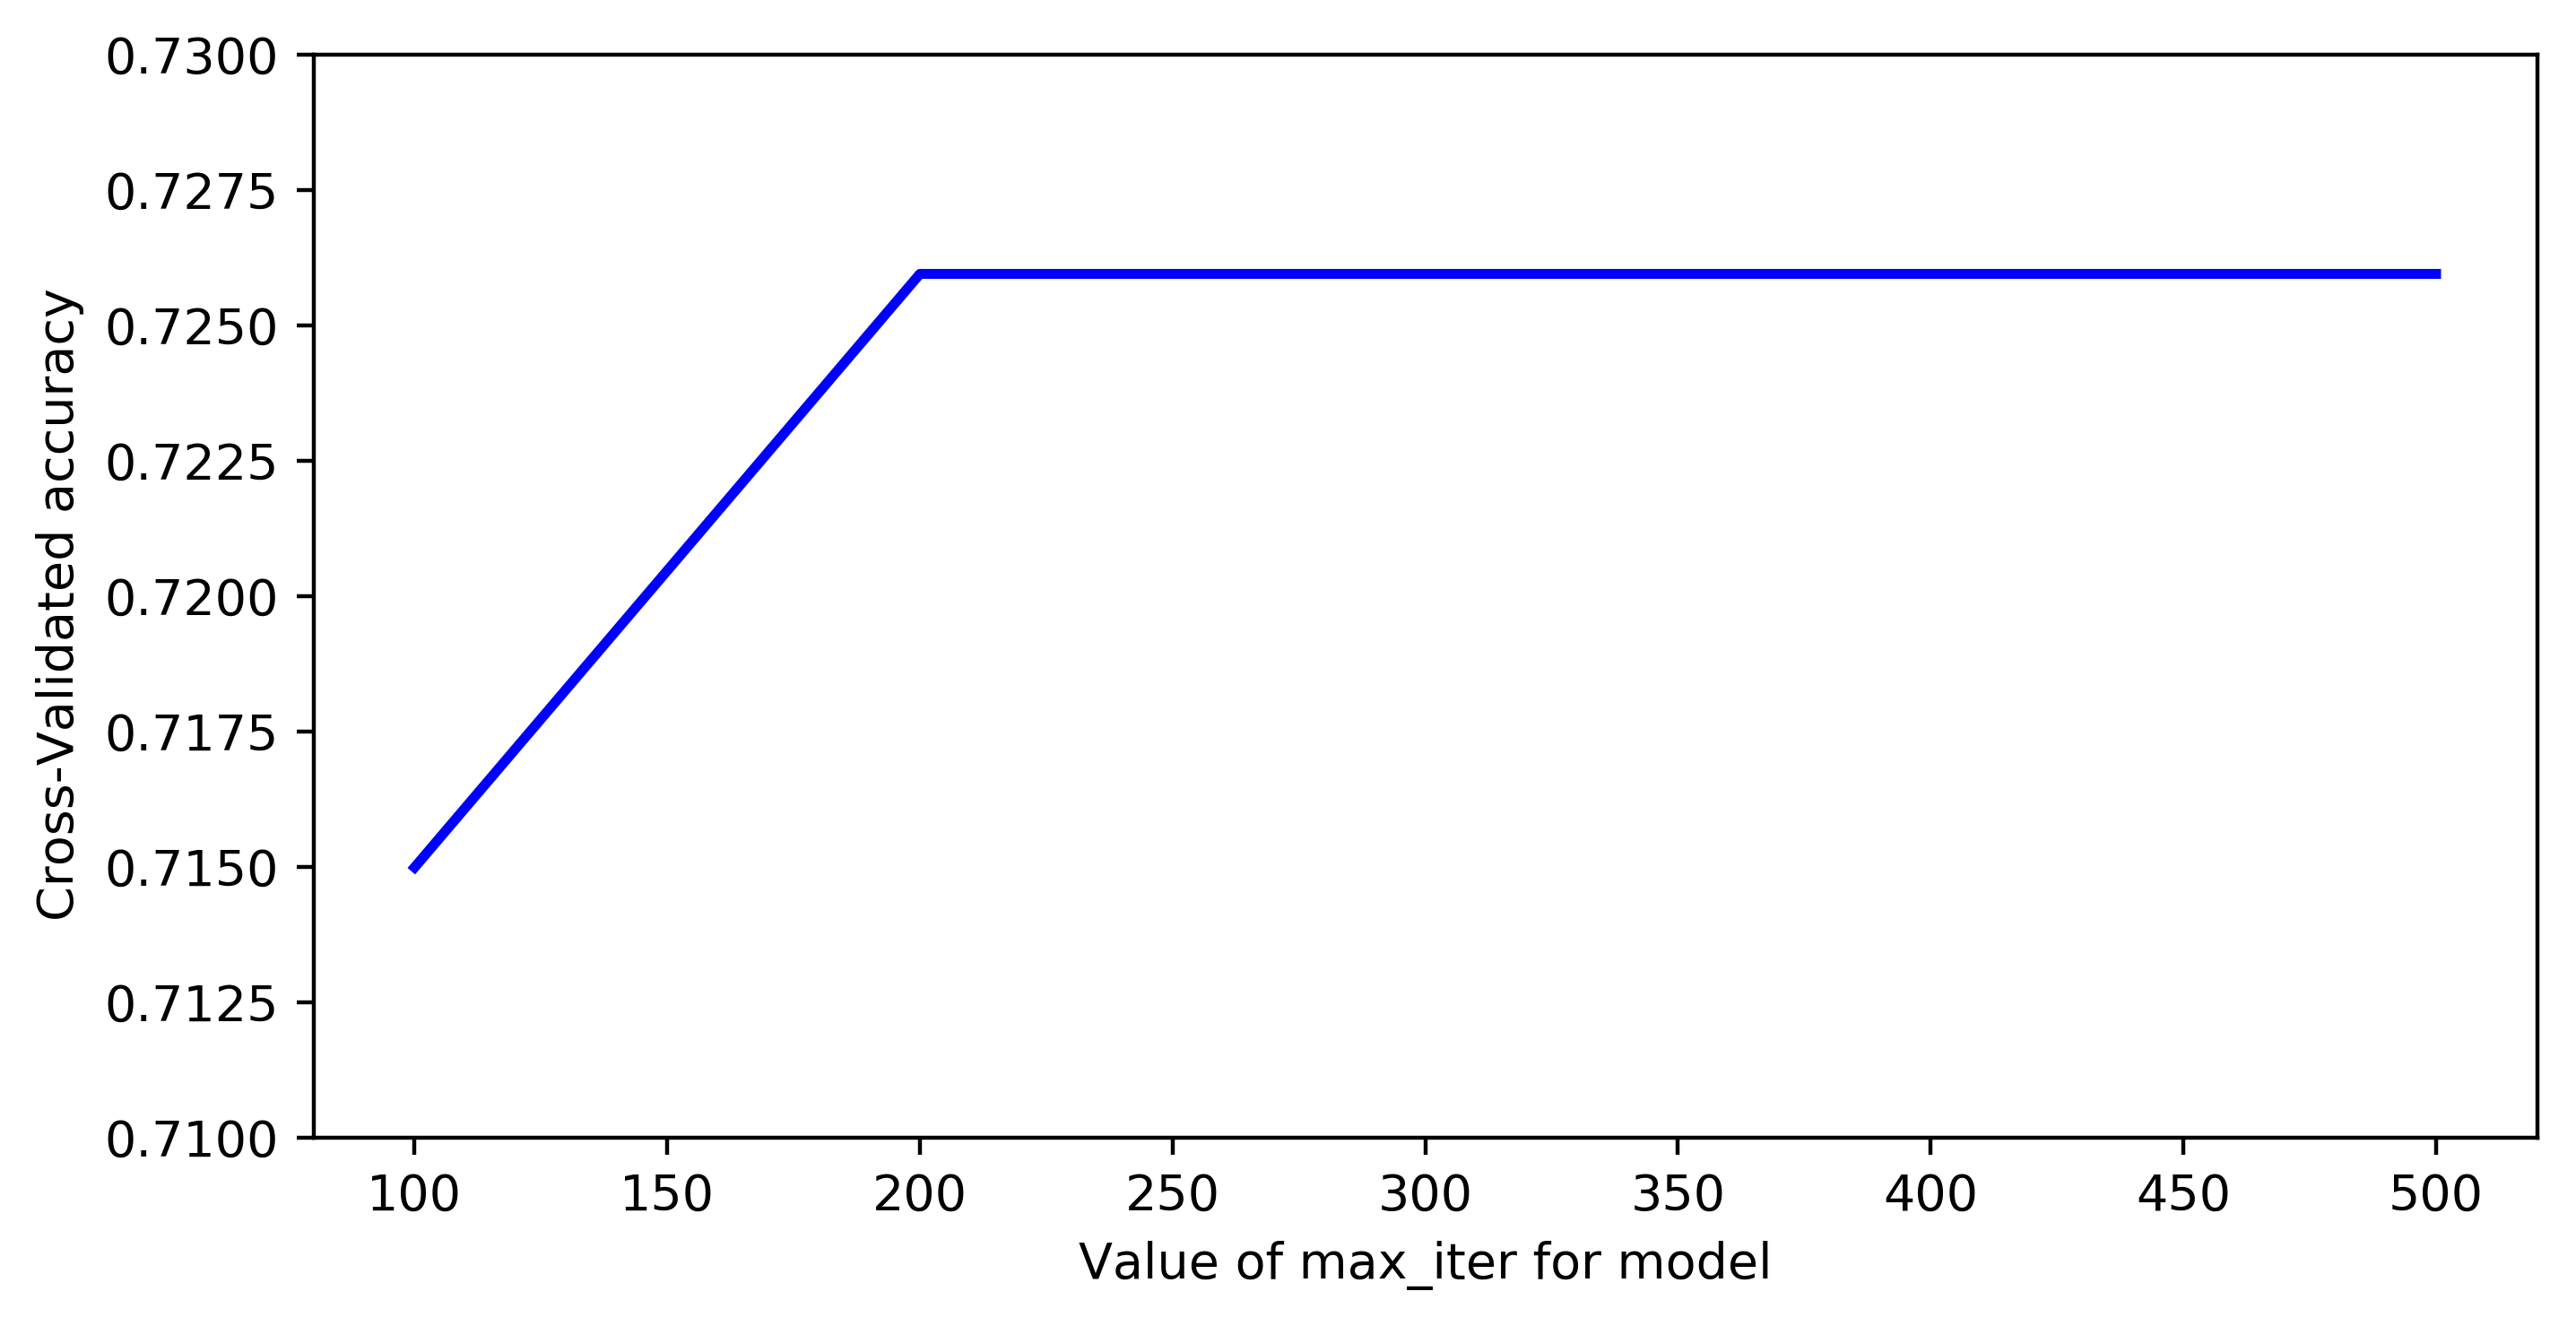

In [23]:
x =  [100,200,300,400,500]
y=[0.71499,0.72595,0.72595,0.72595,0.72595]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of max_iter for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.71,0.73)
plt.show
plt.savefig('../Data/ANN_accuracy_2.png', format='png')

In [3]:

from sklearn.model_selection import cross_val_score
classifier= MLPClassifier(learning_rate='constant', learning_rate_init=0.01, max_iter=200,solver='adam',random_state=0)

classifier.fit(X_train, y_train)
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train ,cv=10)
# print('训练集精度为：')

# print('%.5f' %accuracies.mean())




MLPClassifier(learning_rate_init=0.01, random_state=0)

In [4]:
print("正在保存训练数据结果至文件中...")
y_train_pred= classifier.predict(X_train)
y_train_pred = pd.DataFrame({'ANN_train_pred': y_train_pred})
Df = pd.concat([df, y_train_pred ], axis=1)
writer = pd.ExcelWriter('../data/train6041.xlsx', engine='xlsxwriter')

Df.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
print("处理完毕，已保存至文件！")
input("Please press <enter>")

print('训练集精度为：')

accuracy_score(y_train,y_train_pred)


正在保存训练数据结果至文件中...
处理完毕，已保存至文件！
Please press <enter>
训练集精度为：


0.7441303306181121

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred,digits=5))


              precision    recall  f1-score   support

           1    0.95522   0.95522   0.95522        67
           2    0.95833   0.49286   0.65094       140
           3    0.83300   0.98445   0.90241       836
           4    0.71141   0.69737   0.70432       456
           5    0.80000   0.16667   0.27586        24
           6    0.46409   0.47458   0.46927       177
           7    0.48958   0.43519   0.46078       108
           8    0.51429   0.45378   0.48214       119
           9    0.85455   0.75806   0.80342        62
          10    0.60563   0.43878   0.50888        98

    accuracy                        0.74413      2087
   macro avg    0.71861   0.58569   0.62133      2087
weighted avg    0.74111   0.74413   0.73178      2087



In [26]:
print("开始读入测试数据...")
testDf = pd.read_excel('../data/test6041.xlsx', sheet_name='Sheet1')


# ttc = csc.transform(testDf[' temperature logging'].values.reshape(-1, 1))
# ttd = dsc.transform(testDf['Vertical Component Logging '].values.reshape(-1, 1))
tte = esc.transform(testDf['Fluid resistivity logging'].values.reshape(-1, 1))
ttf = fsc.transform(testDf['natural gamma-ray logging'].values.reshape(-1, 1))
ttg = gsc.transform(testDf['spontaneous potential logging'].values.reshape(-1, 1))


X_test = np.concatenate((tte,ttf,ttg), axis=1)

y_test = np.array(testDf['rock'])

开始读入测试数据...


In [27]:
classifier.fit(X_test, y_test)
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test,cv=10)
# print('测试集精度为：')

# print('%.5f' %accuracies.mean())

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_

In [28]:
# y_test_pred = classifier.predict(X_test)
y_test_pred= classifier.predict(X_test)
print("正在保存测试结果至文件中...")
y_test_pred = pd.DataFrame({'ANN_test_pred':y_test_pred })
wDf = pd.concat([testDf, y_test_pred ], axis=1)
writer = pd.ExcelWriter('../data/test6041.xlsx', engine='xlsxwriter')

wDf.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
print("处理完毕，已保存至文件！")
input("Please press <enter>")
print('测试集精度为：')

accuracy_score(y_test,y_test_pred)

正在保存测试结果至文件中...
处理完毕，已保存至文件！
Please press <enter>
测试集精度为：


0.7471264367816092

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred,digits=5))



              precision    recall  f1-score   support

           1    1.00000   1.00000   1.00000        16
           2    1.00000   0.45455   0.62500        33
           3    0.81200   0.97129   0.88453       209
           4    0.62759   0.79825   0.70270       114
           5    0.00000   0.00000   0.00000         3
           6    0.56522   0.32500   0.41270        40
           7    0.56000   0.43750   0.49123        32
           8    0.76923   0.33333   0.46512        30
           9    0.88235   0.83333   0.85714        18
          10    0.72222   0.48148   0.57778        27

   micro avg    0.74713   0.74713   0.74713       522
   macro avg    0.69386   0.56347   0.60162       522
weighted avg    0.74567   0.74713   0.72569       522



C:\Users\pc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.455 0.545 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.971 0.014 0.    0.    0.014 0.    0.    0.   ]
 [0.    0.    0.096 0.798 0.    0.035 0.044 0.009 0.009 0.009]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.075 0.575 0.    0.325 0.    0.025 0.    0.   ]
 [0.    0.    0.344 0.156 0.    0.    0.438 0.    0.    0.062]
 [0.    0.    0.    0.433 0.    0.167 0.    0.333 0.    0.067]
 [0.    0.    0.    0.167 0.    0.    0.    0.    0.833 0.   ]
 [0.    0.    0.037 0.259 0.    0.037 0.111 0.037 0.037 0.481]]


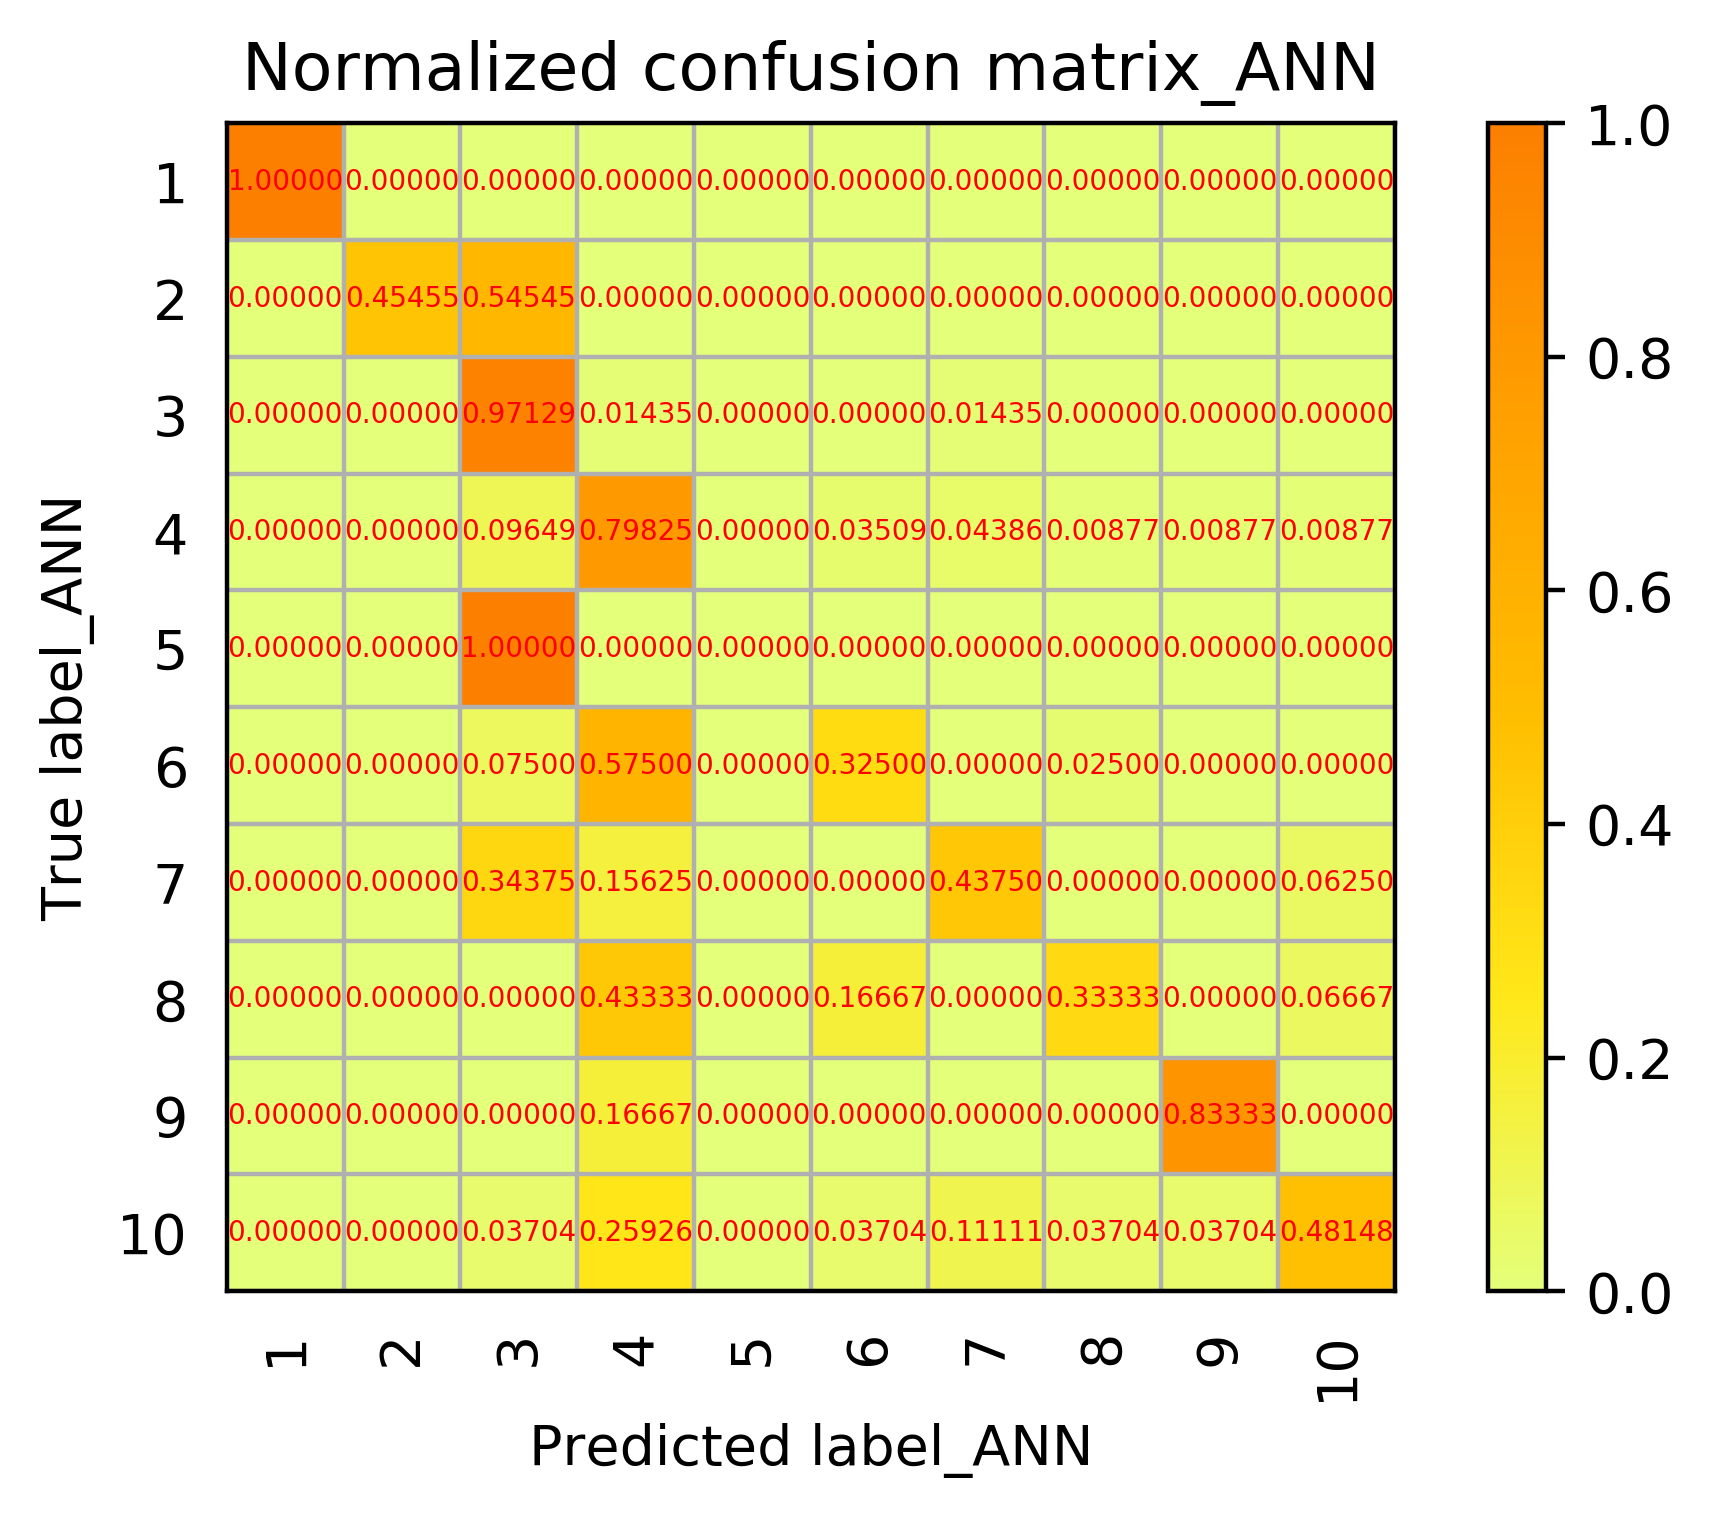

In [30]:


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
labels = ['1', '2', '3','4','5','6','7','8','9','10']
tick_marks = np.array(range(len(labels))) + 0.5
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label_ANN')
    plt.xlabel('Predicted label_ANN')
cm = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=3)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
plt.figure(figsize=(6, 4), dpi=400)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c >= 0.0:
        plt.text(x_val, y_val, "%0.5f" % (c,), color='red', fontsize=5, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix_ANN')
# show confusion matrix
plt.savefig('../Data/confusion_matrix_ANN.png', format='png')
plt.show()